<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/%EB%94%B0%EB%9D%BC%ED%95%B4%EB%B3%B4%EB%8A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib as mpl
import glob, os # 파일 경로에 관한 라이브러리
import matplotlib.pylab as plt

In [ ]:
for font in fm.fontManager.ttflist:
    print(font.name) # 폰트 이름을 설정

NameError: name 'fm' is not defined

In [ ]:
# 한글 글자폰트 확인
mpl.rcParams['font.family']='Malgun Gothic'
mpl.rcParams['font.size']= 12
mpl.rcParams['figure.figsize'] = (14,4)

plt.rcParams['axes.unicode_minus']=False

In [ ]:
from matplotlib import font_manager, rc
df_path =r'C:/Users/HKIT/Desktop/재정데이터 시각화모델 경진대회 데이터_열린재정/1. 예산'
df_path

'C:/Users/HKIT/Desktop/재정데이터 시각화모델 경진대회 데이터_열린재정/1. 예산'

In [ ]:
df = pd.read_excel('1-2-2. 세출 지출 세목 예산편성현황(총지출).xlsx',sheet_name='Sheet0')

In [ ]:
df_work = df[df.iloc[:,1]=='고용노동부']
df_young = df_work[df_work.loc[:,'단위사업명'].str.contains('청년')] ## 단위사업명 내에 청년이 포함된 경우에만 해당

In [ ]:
total_work = df_work.groupby(['회계연도'])['국회확정금액(천원)'].sum()

In [ ]:
subtotal_young = df_young.groupby(['회계연도'])['국회확정금액(천원)'].sum()

In [ ]:
young_ratio = pd.DataFrame(subtotal_young/total_work)

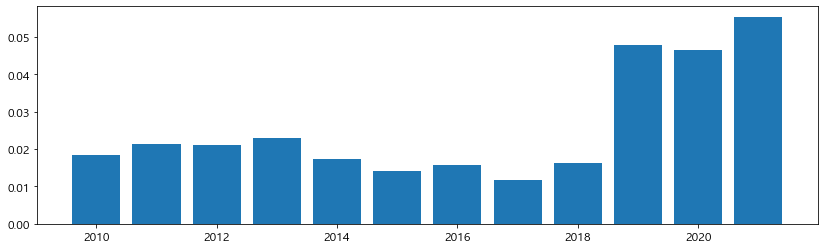

In [ ]:
plt.bar(young_ratio.index.values,young_ratio.iloc[:,0])
plt.show()

In [ ]:
df_young_3 = df_young[df_young.loc[:,'회계연도']>=2019]

In [ ]:
df_young_3_total = pd.DataFrame(df_young_3.groupby(['회계연도', '세부사업명'])['국회확정금액(천원)'].sum())
df_young_3_total.reset_index(inplace=True)

In [ ]:
df_young_3_pivot = pd.DataFrame(df_young_3.groupby(['회계연도','세부사업명'])['국회확정금액(천원)'].sum().unstack()).fillna(0)
df_young_3_pivot

세부사업명,인문특화청년취업아카데미,중소기업 청년취업 인턴제,중소기업청년인턴제,직업정보제공및직업지도,청년구직활동지원금,청년내일채움공제,청년내일채움공제(고보),청년내일채움공제(일반),청년일자리창출지원,청년추가고용장려금,청년취업아카데미,청년취업진로 및 일경험 지원,청년취업진로및일경험지원,한국잡월드운영,한국잡월드운영지원,해외취업지원,호남권직업체험센터설립
회계연도,,,,,,,,,,,,,,,,,
2019,21121000.0,0.0,0.0,0.0,158186000.0,997132000.0,0.0,0.0,0.0,0.0,0.0,26041000.0,0.0,21180000.0,0.0,56002000.0,0.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,503268000.0,778704000.0,0.0,0.0,18444000.0,26041000.0,0.0,25449000.0,0.0,59574000.0,8085000.0
2021,0.0,0.0,0.0,3811000.0,0.0,0.0,493592000.0,908102000.0,467600000.0,0.0,0.0,21931000.0,0.0,0.0,26962000.0,52625000.0,0.0


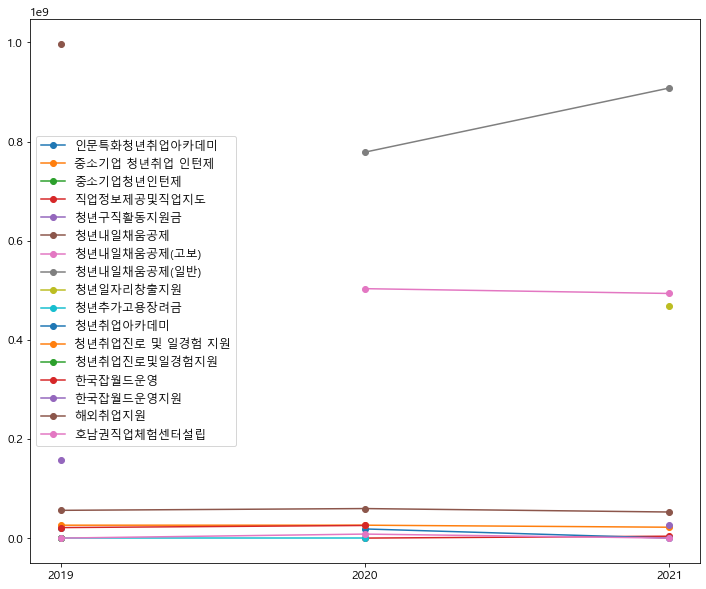

In [ ]:
plt.figure(figsize=(12,10))
ax = plt.subplot()
for i in sorted(pd.Series.unique(df_young_3_total['세부사업명'])) :
    x = df_young_3_total[df_young_3_total['세부사업명'] == i]['회계연도']
    y = df_young_3_total[df_young_3_total['세부사업명'] == i]['국회확정금액(천원)']
    plt.plot(x, y, label=i,marker='o')
plt.legend(loc=6)
ax.set_xticks([2019, 2020, 2021])
plt.show()

In [ ]:
df_young_3_total_2021 = df_young_3_total[df_young_3_total['회계연도']==2021]
df_young_3_total_2021_ratio = df_young_3_total_2021['국회확정금액(천원)']/df_young_3_total_2021['국회확정금액(천원)'].sum(axis=0)
df_young_3_total_2021_label = df_young_3_total_2021['세부사업명']

In [ ]:
df_young_2021_pie = pd.DataFrame({'비율': df_young_3_total_2021_ratio,'세부사업명': df_young_3_total_2021_label}).sort_values(by='비율',ascending=False)

C:\Users\HKIT\AppData\Local\Temp/ipykernel_6304/2191776192.py:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(df_young_2021_pie['비율'], labels=df_young_2021_pie['세부사업명'], autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90, counterclock=False)


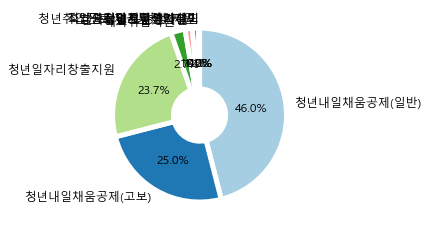

In [ ]:
palette = sns.color_palette("bright")
sns.set_palette("Paired")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_young_2021_pie['비율'], labels=df_young_2021_pie['세부사업명'], autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90, counterclock=False)

plt.show()

In [ ]:
df_young_else = df_work[-df_work.loc[:,'단위사업명'].str.contains('청년')]

In [ ]:
len(pd.Series.unique(df_young_else['단위사업명']))

264

In [ ]:
df_young_else_3 = df_young_else[df_young_else.loc[:,'회계연도']>=2019]

In [ ]:
df_young_else_3_check = df_young_else_3.groupby(['세부사업명']).sum().sort_values(by='국회확정금액(천원)', ascending=False)
df_young_else_3_check.reset_index(inplace=True)

In [ ]:
df_young_else_3_check.iloc[0:10,:] ## 세부사업 띄어쓰기에 따라 합계가 달라지고 있음. 띄어쓰기 없애기 진행

,세부사업명,회계연도,전년도국회확정금액(천원),정부안금액(천원),국회확정금액(천원)
0,구직급여,6060,2.285576e+10,2.827370e+10,2.804716e+10
1,산재보험급여,6060,1.600928e+10,1.746466e+10,1.749816e+10
2,일자리안정자금지원,76760,7.954309e+09,6.280104e+09,6.280104e+09
3,모성보호육아지원,8079,4.309592e+09,4.590061e+09,4.590061e+09
4,사회보험사각지대해소,36360,3.384122e+09,3.329459e+09,3.301290e+09
5,고용창출장려금,54540,1.416028e+09,2.277543e+09,2.201793e+09
6,내일배움카드(고보),42430,1.473262e+09,1.581317e+09,1.580817e+09
7,체당금지급,6060,1.254839e+09,1.525598e+09,1.514714e+09
8,고용유지지원금,12120,1.074150e+08,1.265236e+09,1.446684e+09
9,청년추가고용장려금,8084,9.919000e+08,1.201802e+09,1.201802e+09


In [ ]:
for i in range(len(df_young_else_3)):
    df_young_else_3.iloc[i,8] = df_young_else_3.iloc[i,8].replace(' ','')

C:\Users\HKIT\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_young_else_3_check = df_young_else_3.groupby(['세부사업명']).sum().sort_values(by='국회확정금액(천원)', ascending=False)
df_young_else_3_check.reset_index(inplace=True)

In [ ]:
df_young_else_top10 = pd.DataFrame(df_young_else_3_check.iloc[0:10,0])

In [ ]:
df_young_else_top10

,세부사업명
0,구직급여
1,산재보험급여
2,일자리안정자금지원
3,모성보호육아지원
4,사회보험사각지대해소
5,고용창출장려금
6,내일배움카드(고보)
7,체당금지급
8,고용유지지원금
9,청년추가고용장려금


In [ ]:
df_young_else_3_f = pd.merge(df_young_else_top10, df_young_else_3, on='세부사업명')

In [ ]:
df_young_else_3_total = pd.DataFrame(df_young_else_3_f.groupby(['회계연도', '세부사업명'])['국회확정금액(천원)'].sum())
df_young_else_3_total.reset_index(inplace=True)

In [ ]:
df_young_else_3_pivot = pd.DataFrame(df_young_else_3_f.groupby(['회계연도','세부사업명'])['국회확정금액(천원)'].sum().unstack()).fillna(0)
df_young_else_3_pivot

세부사업명,고용유지지원금,고용창출장려금,구직급여,내일배움카드(고보),모성보호육아지원,사회보험사각지대해소,산재보험급여,일자리안정자금지원,청년추가고용장려금,체당금지급
회계연도,,,,,,,,,,
2019,3.876300e+07,8.722170e+08,7.182783e+09,0.0,1.455276e+09,1.341932e+09,5.069964e+09,2.818824e+09,0.000000e+00,411423000.0
2020,3.508900e+07,1.143095e+09,9.515779e+09,780316000.0,1.543248e+09,1.149011e+09,5.904634e+09,2.164716e+09,0.000000e+00,433460000.0
2021,1.372832e+09,1.864810e+08,1.134860e+10,800501000.0,1.591537e+09,8.103470e+08,6.523565e+09,1.296564e+09,1.201802e+09,669831000.0


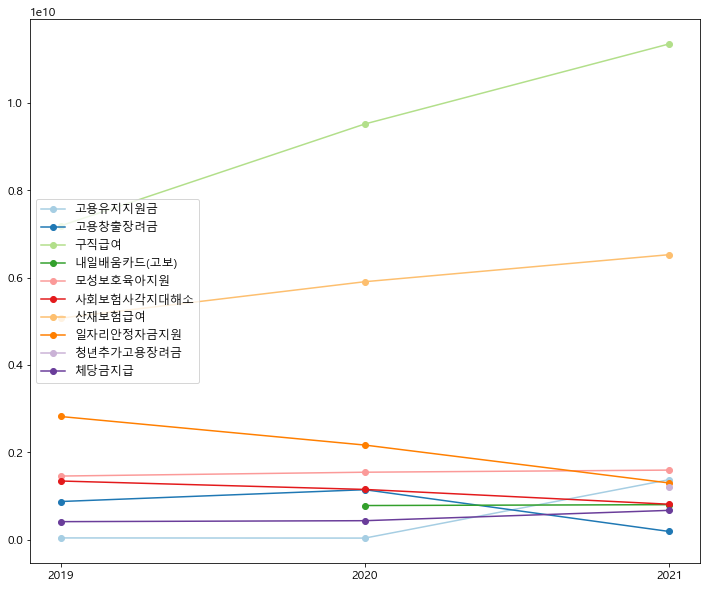

In [ ]:
plt.figure(figsize=(12,10))
ax = plt.subplot()
for i in sorted(pd.Series.unique(df_young_else_3_total['세부사업명'])) :
    x = df_young_else_3_total[df_young_else_3_total['세부사업명'] == i]['회계연도']
    y = df_young_else_3_total[df_young_else_3_total['세부사업명'] == i]['국회확정금액(천원)']
    plt.plot(x, y, label=i,marker='o')
plt.legend(loc=6)
ax.set_xticks([2019, 2020, 2021])
plt.show()

In [ ]:
df_young_else_3_total_2021 = df_young_else_3_total[df_young_else_3_total['회계연도']==2021]
df_young_else_3_total_2021_ratio = df_young_else_3_total_2021['국회확정금액(천원)']/df_young_else_3_total_2021['국회확정금액(천원)'].sum(axis=0)
df_young_else_3_total_2021_label = df_young_else_3_total_2021['세부사업명']

In [ ]:
df_young_else_2021_pie = pd.DataFrame({'비율': df_young_else_3_total_2021_ratio,'세부사업명': df_young_else_3_total_2021_label}).sort_values(by='비율',ascending=False)

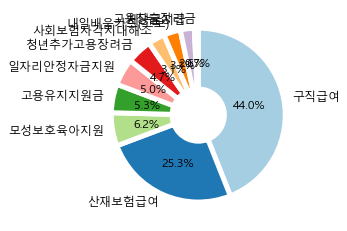

In [ ]:
palette = sns.color_palette("bright")
sns.set_palette("Paired")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_young_else_2021_pie['비율'], labels=df_young_else_2021_pie['세부사업명'], autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90, counterclock=False)
plt.show()

In [ ]:
4. 결론
본 분석은 고용노동부에서 사용하고 있는 예산을 살펴보는 간단한 시각화 분석이었습니다.
청년들을 대상으로 하는 프로그램이 무엇이 있고, 그 외에 모든 사람을 대상으로 하는 프로그램이 어떤 것이 있는지 비교해 보았습니다.
그 결과, 고용노동부에서 청년을 타겟으로 한 프로그램에 할당된 예산은 약 5%였습니다.(단위 사업명 기준).
세부적으로는 내일 채움 공제에 할당된 예산이 가장 높았다(54.8%).
모든 사람들 대상으로 하는 프로그램은 대부분 구직 급여의 비중이 가장 높았다(29.9%).
전반적으로 고용노동부에서 진행하고 있는 프로그램들이 사람들에게 돈을 직접적으로 주는 형태의 프로그램의 비중이 높았다. 이는 현금을 직접 수령할 수 있기에 받는 사람의 활용폭이 좋고 생활에 직접적으로 도움일 될 수 있다는 점에서 좋은 제도라고 개인적으로 평가한다.
또한 내일채움공제의 경우 명확한 목표 금액이 있기 때문에 중소기업을 계속해서 다니게 하는 원동력이 될 수 있을 것으로 보인다.
단, 구직급여의 경우 코로나19로 인해 대량의 실업자가 발생하고 있기 때문에 어쩔 수 없는 비중이라고 생각되어지지만,
단기적인 현금 서포트가 아닌 장기적으로 취업으로 연계될 수 있는 프로그램에 대한 투자가 필요할 것으로 생각되어 진다.